<a href="https://colab.research.google.com/github/AngelMaximiliano0/DolphinDetector/blob/main/modelo_best2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resultados de modelo entrenado en web Ultralytics dado el procesamiento.
- 1702 datos -> train: 1500, val: 142, test: 60

- epochs: 100; imgsz: 640 (redimensión automática de YOLO); batch: 1; optimizador: auto (ADAM)


In [ ]:
# Importe de dataset
from google.colab import drive
drive.mount('/content/drive') #Conecto GDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image as IPyImage

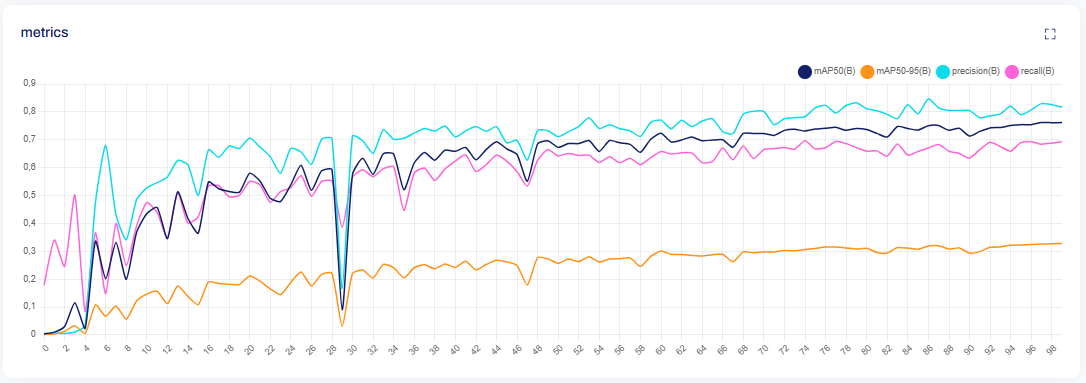

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/graficoultralytics.png")
#Precisión media bastante baja con umbrales altos de IoU.

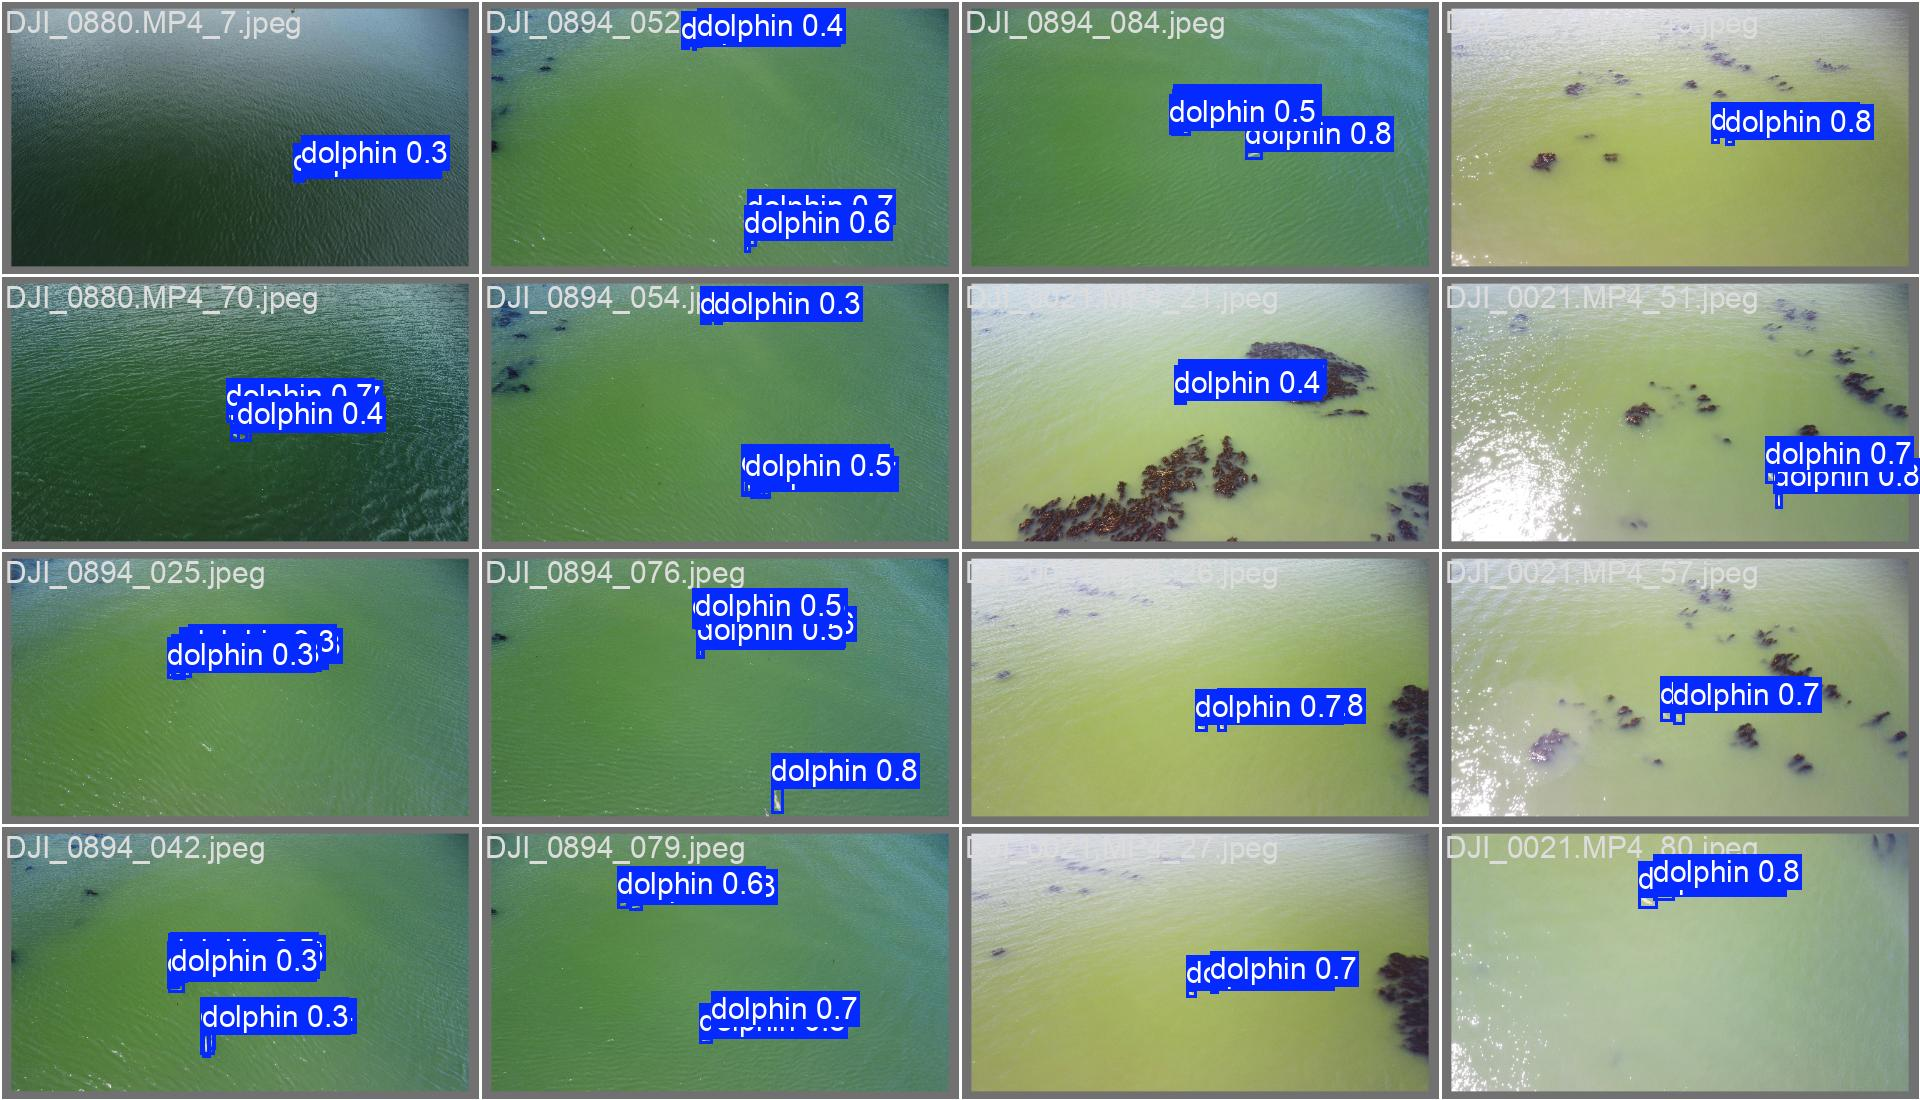

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/val_batch0_pred.jpg")

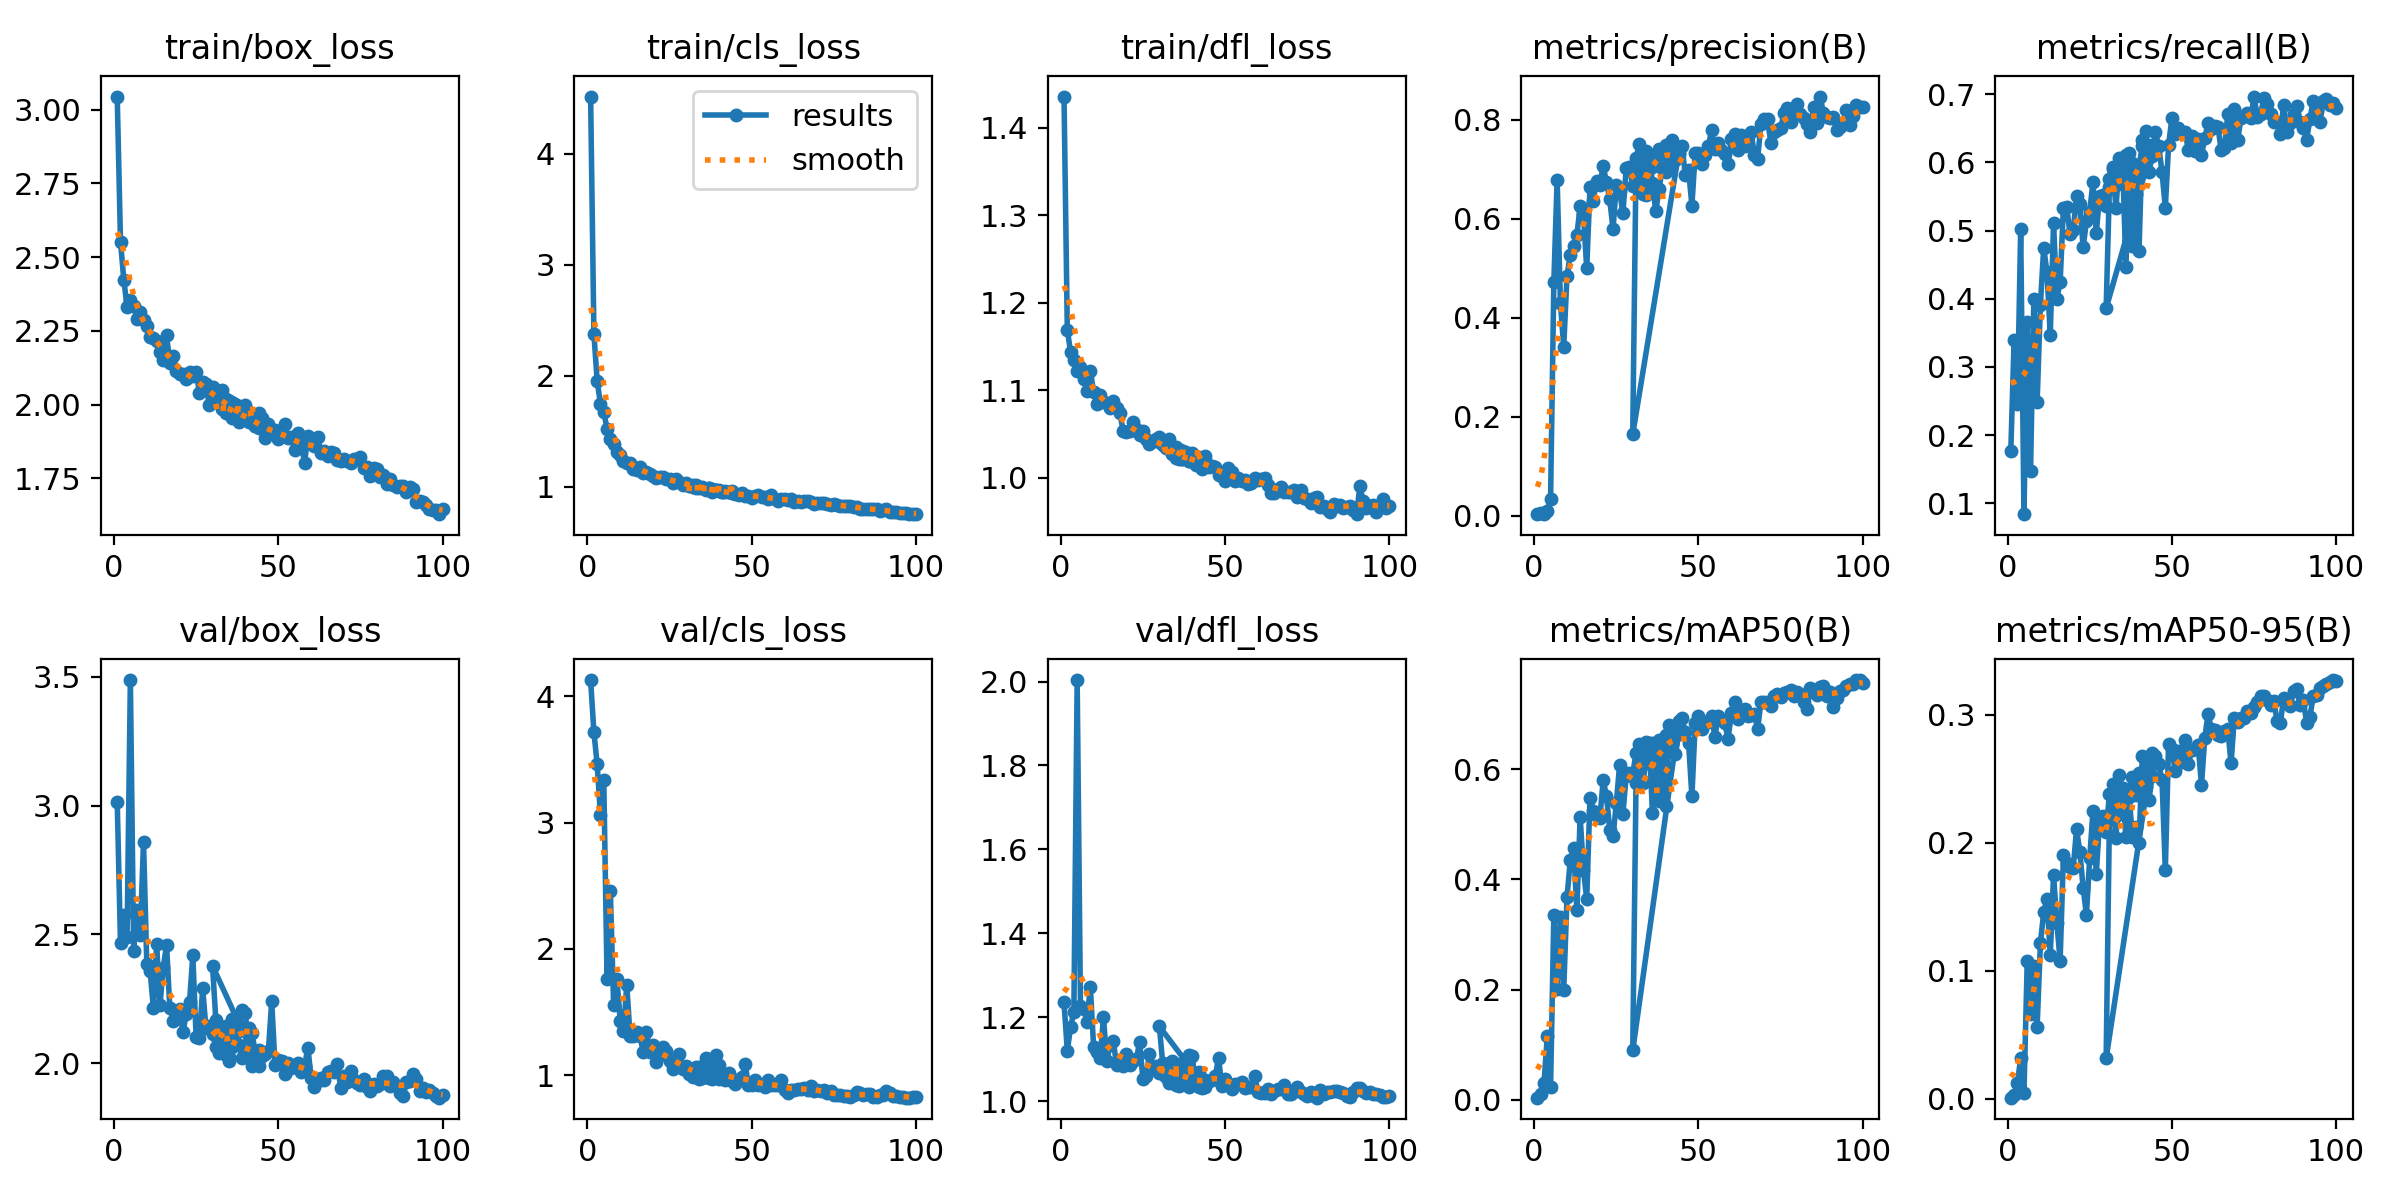

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/results.png", width= 750)

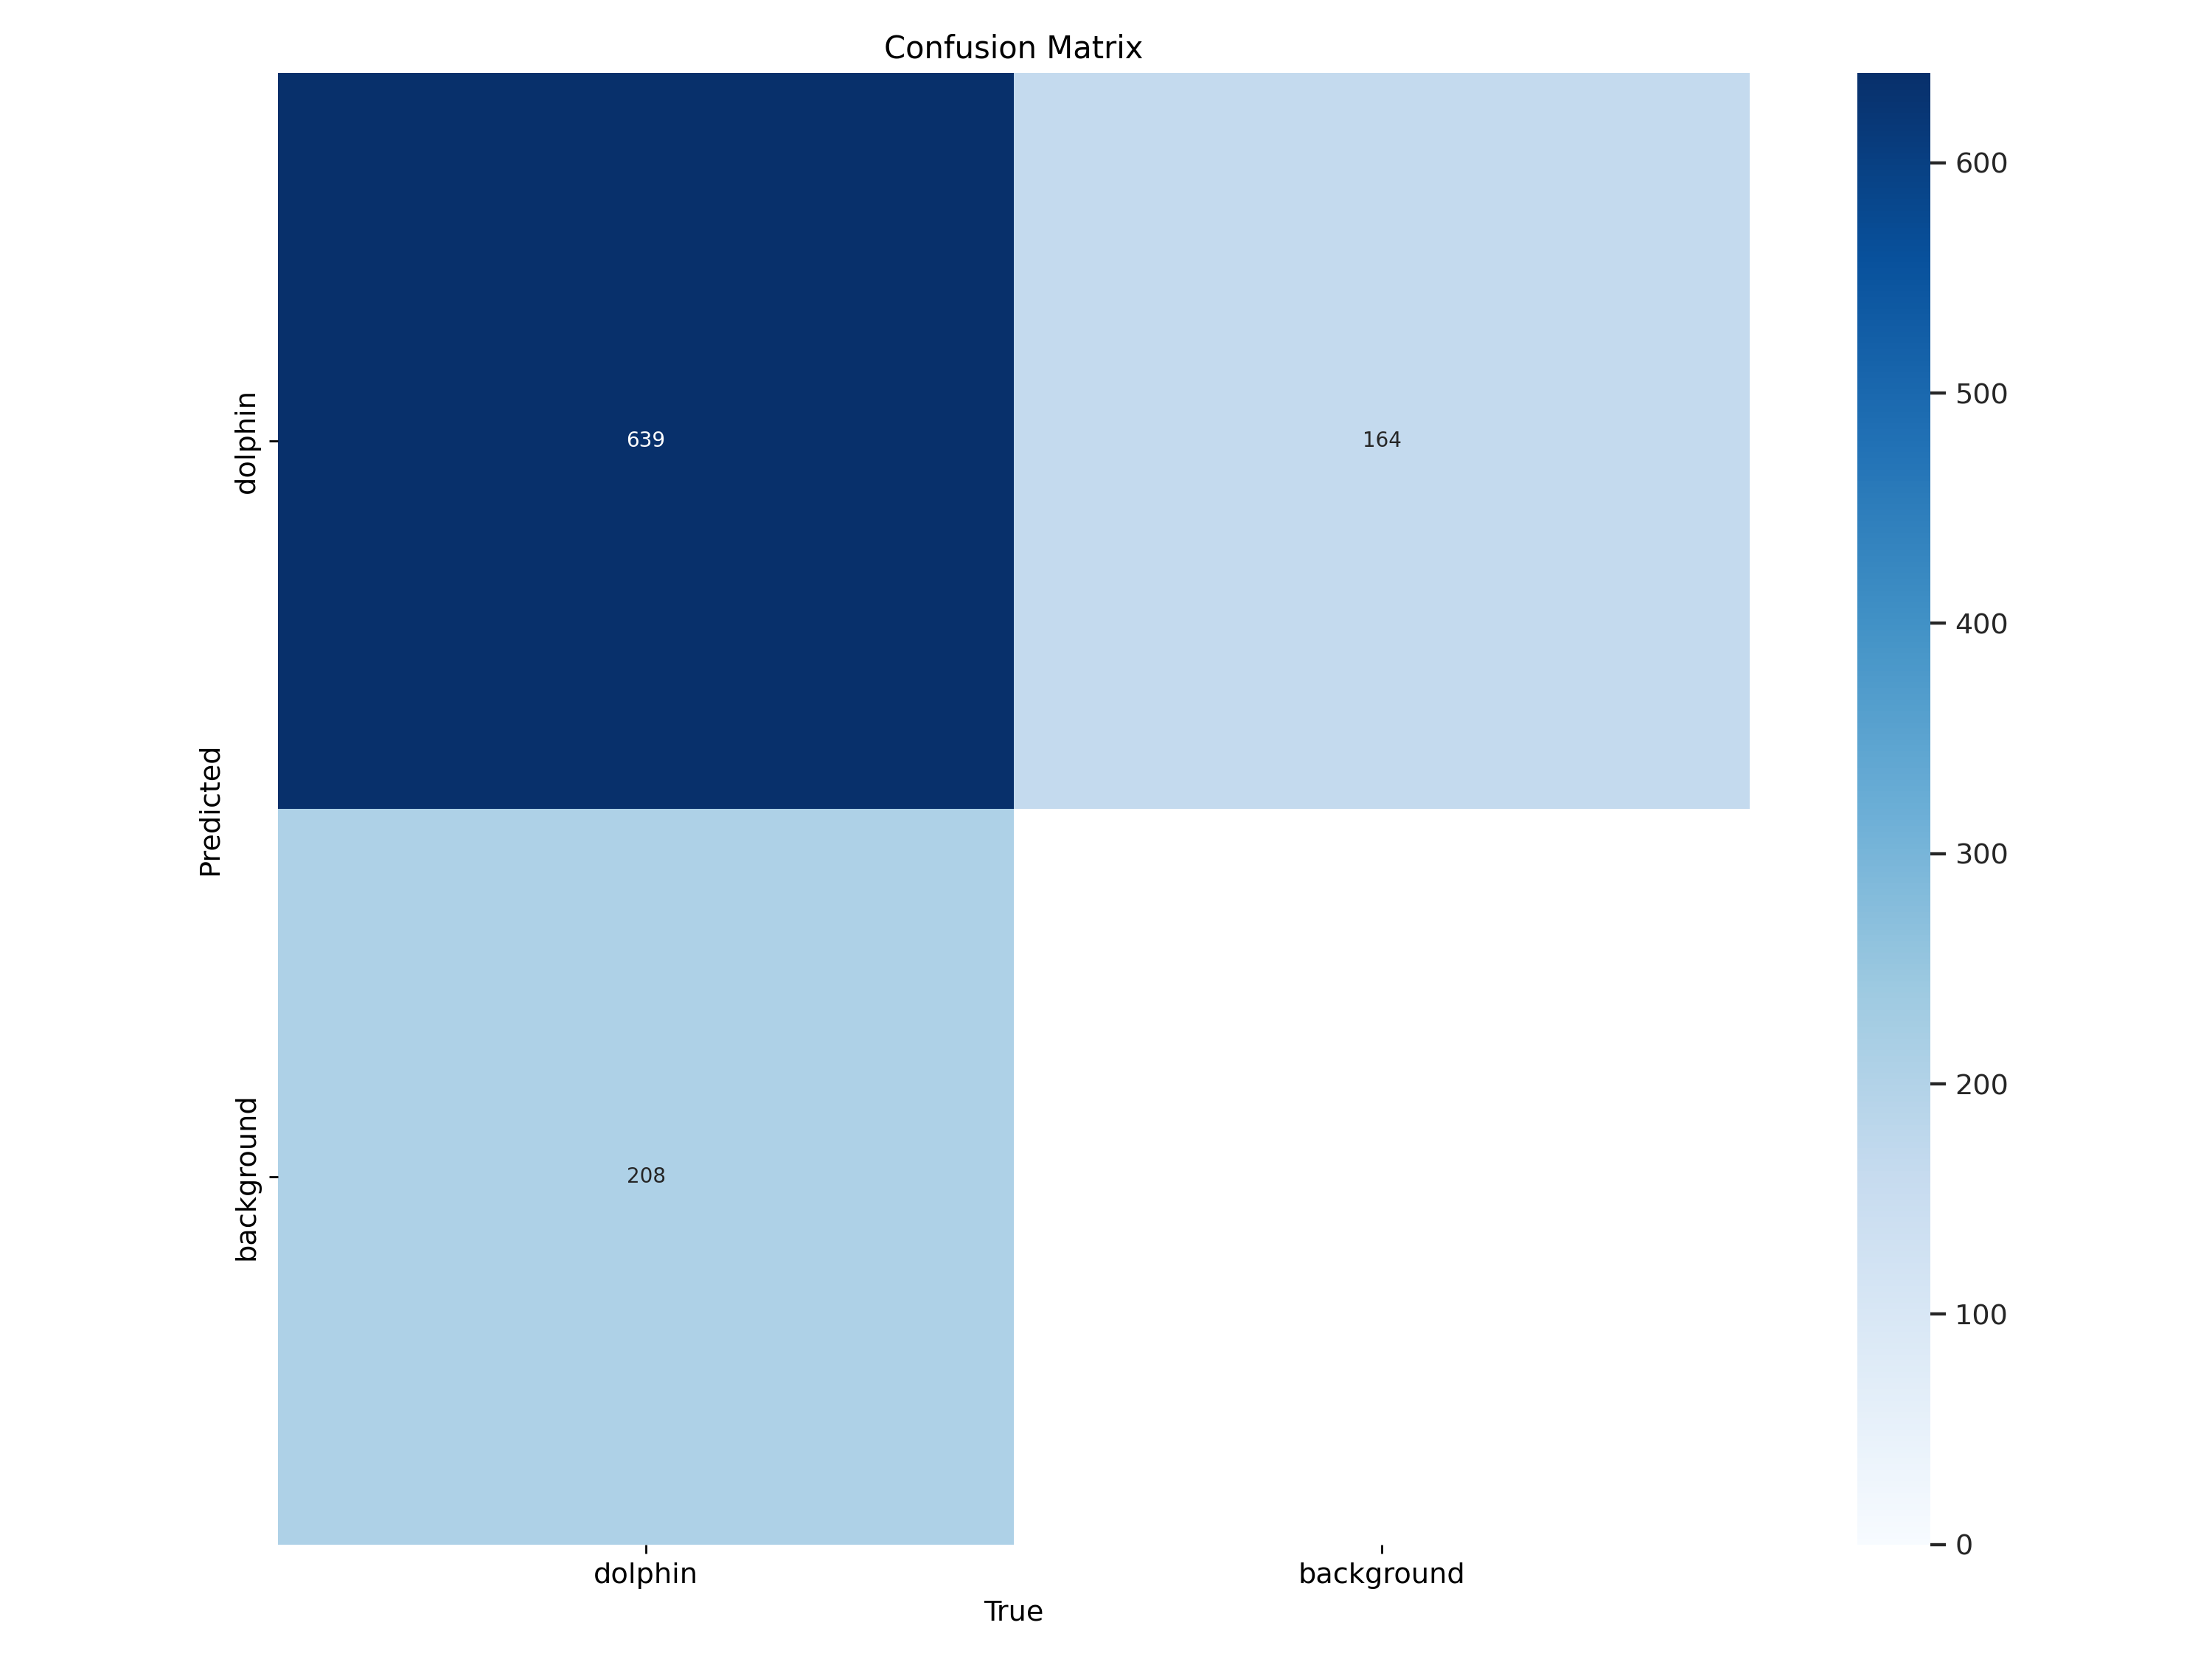

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/confusion_matrix.png", width=600)

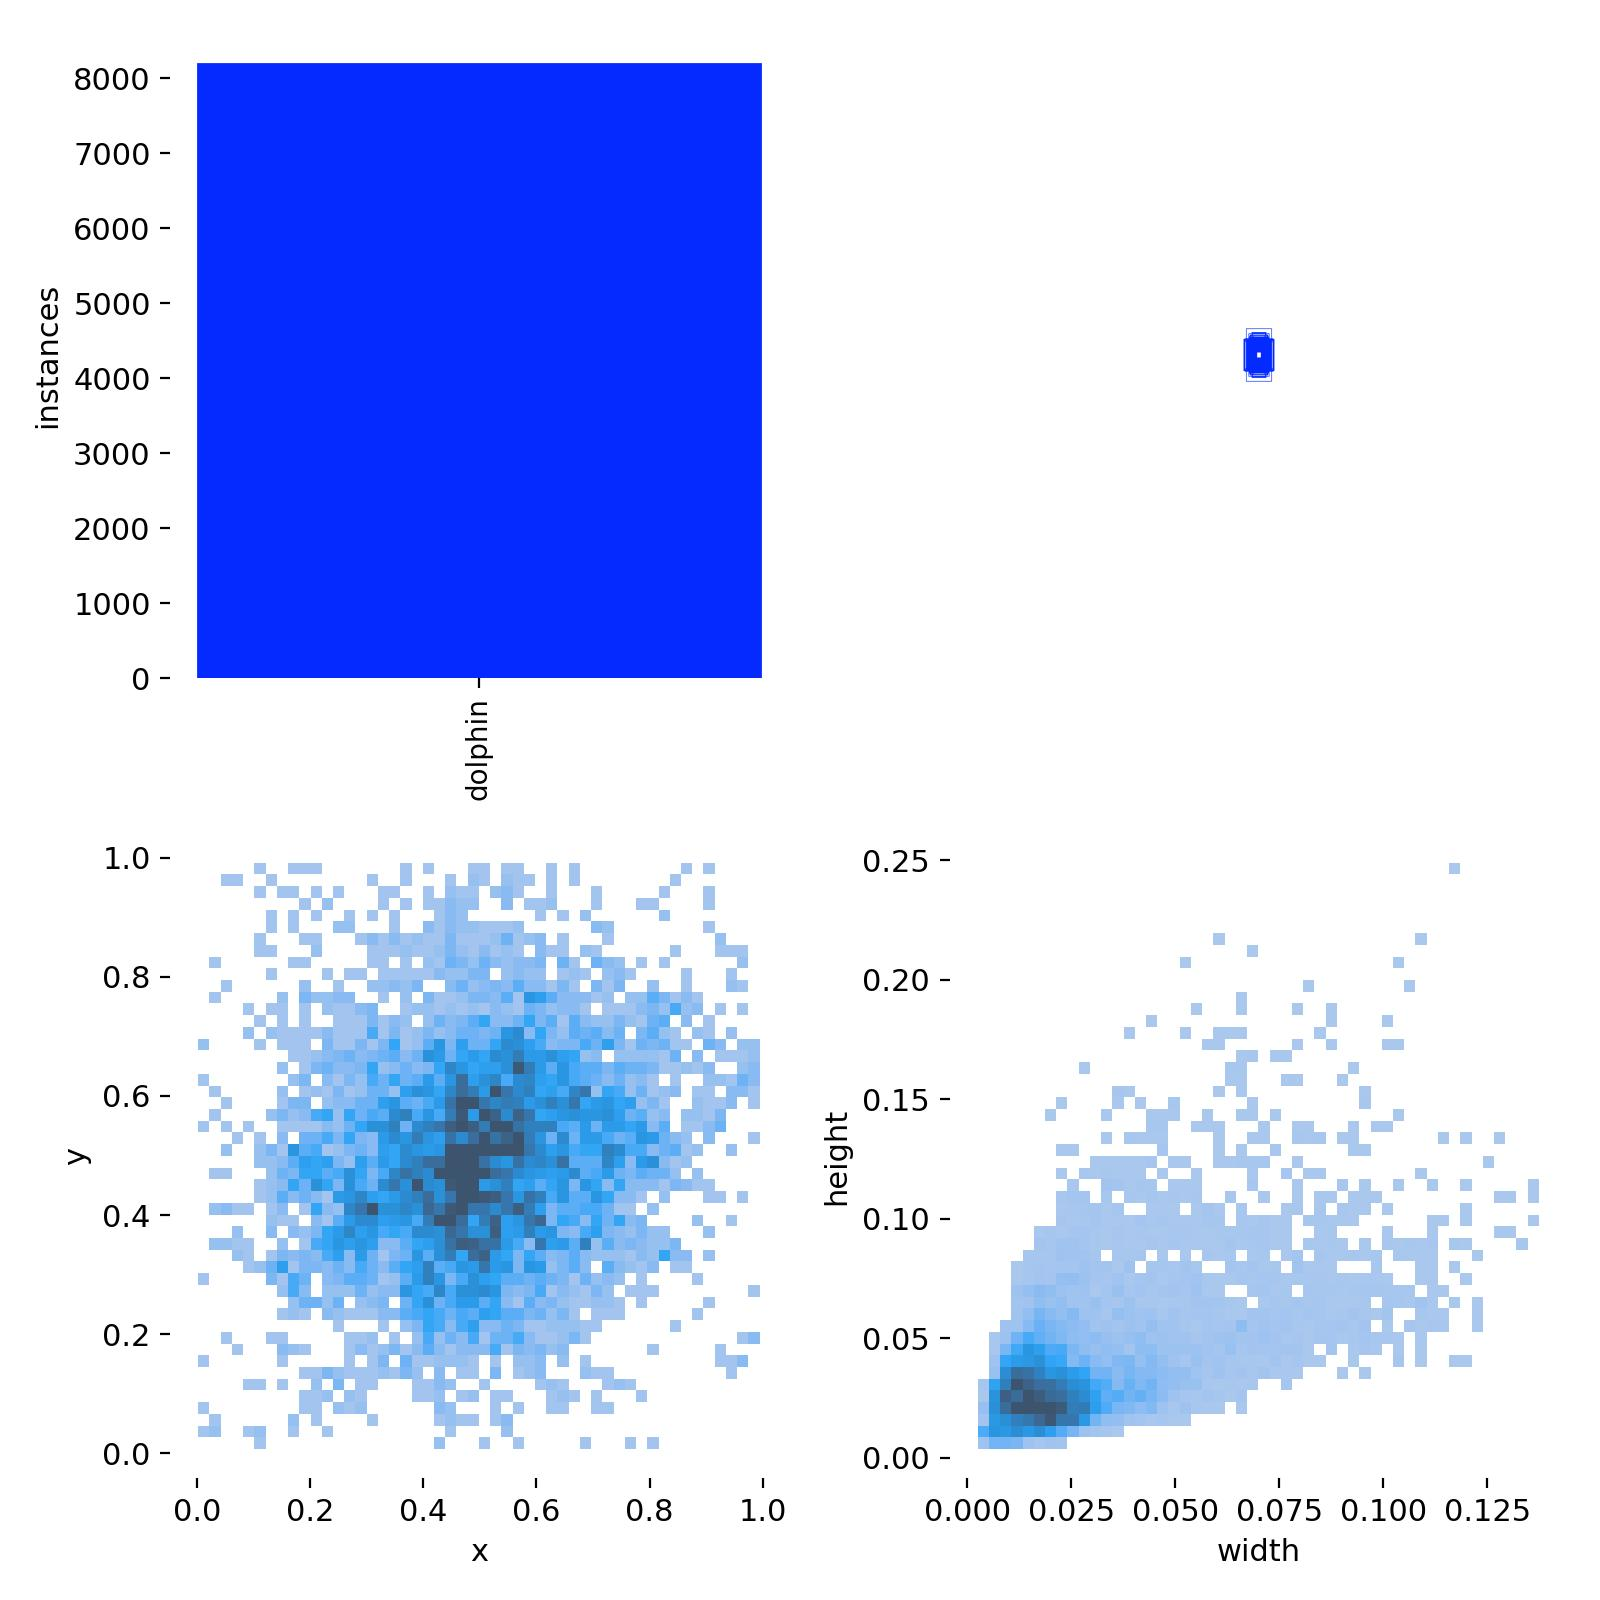

In [ ]:
IPyImage(filename="/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/labels.jpg", width= 400)

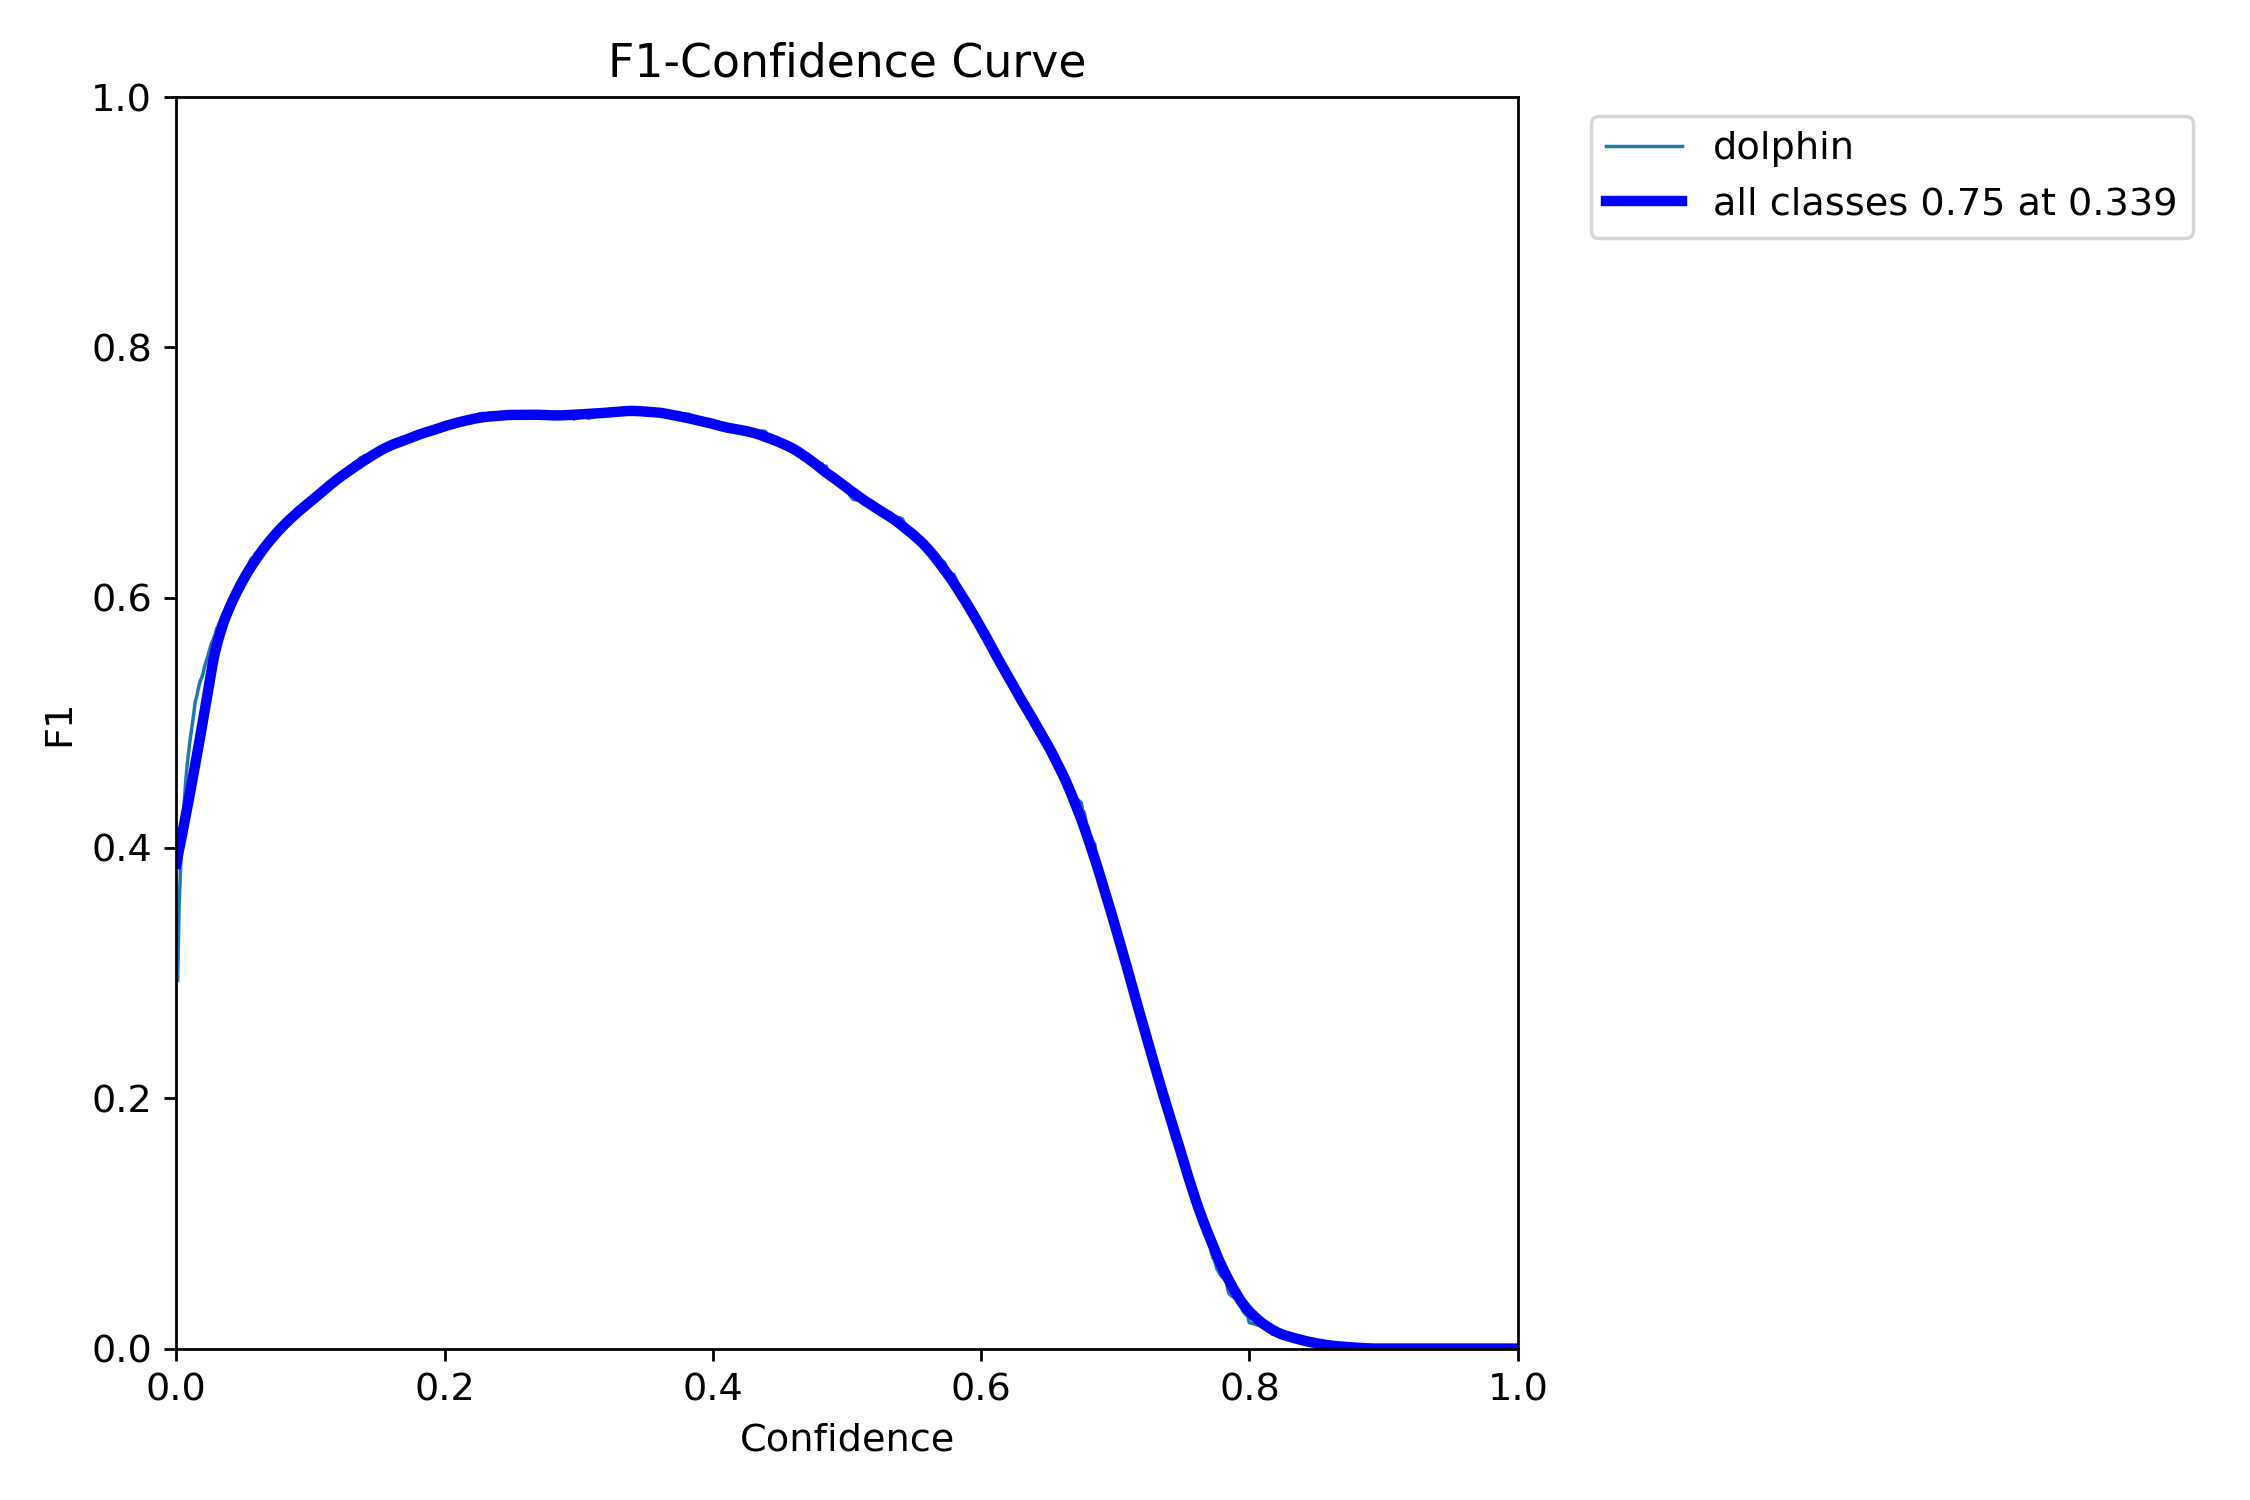

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/F1_curve.png", width = 650)
#F1-Score de 0.75% a un umbral de confianza (probabilidad de detección) de 0.339

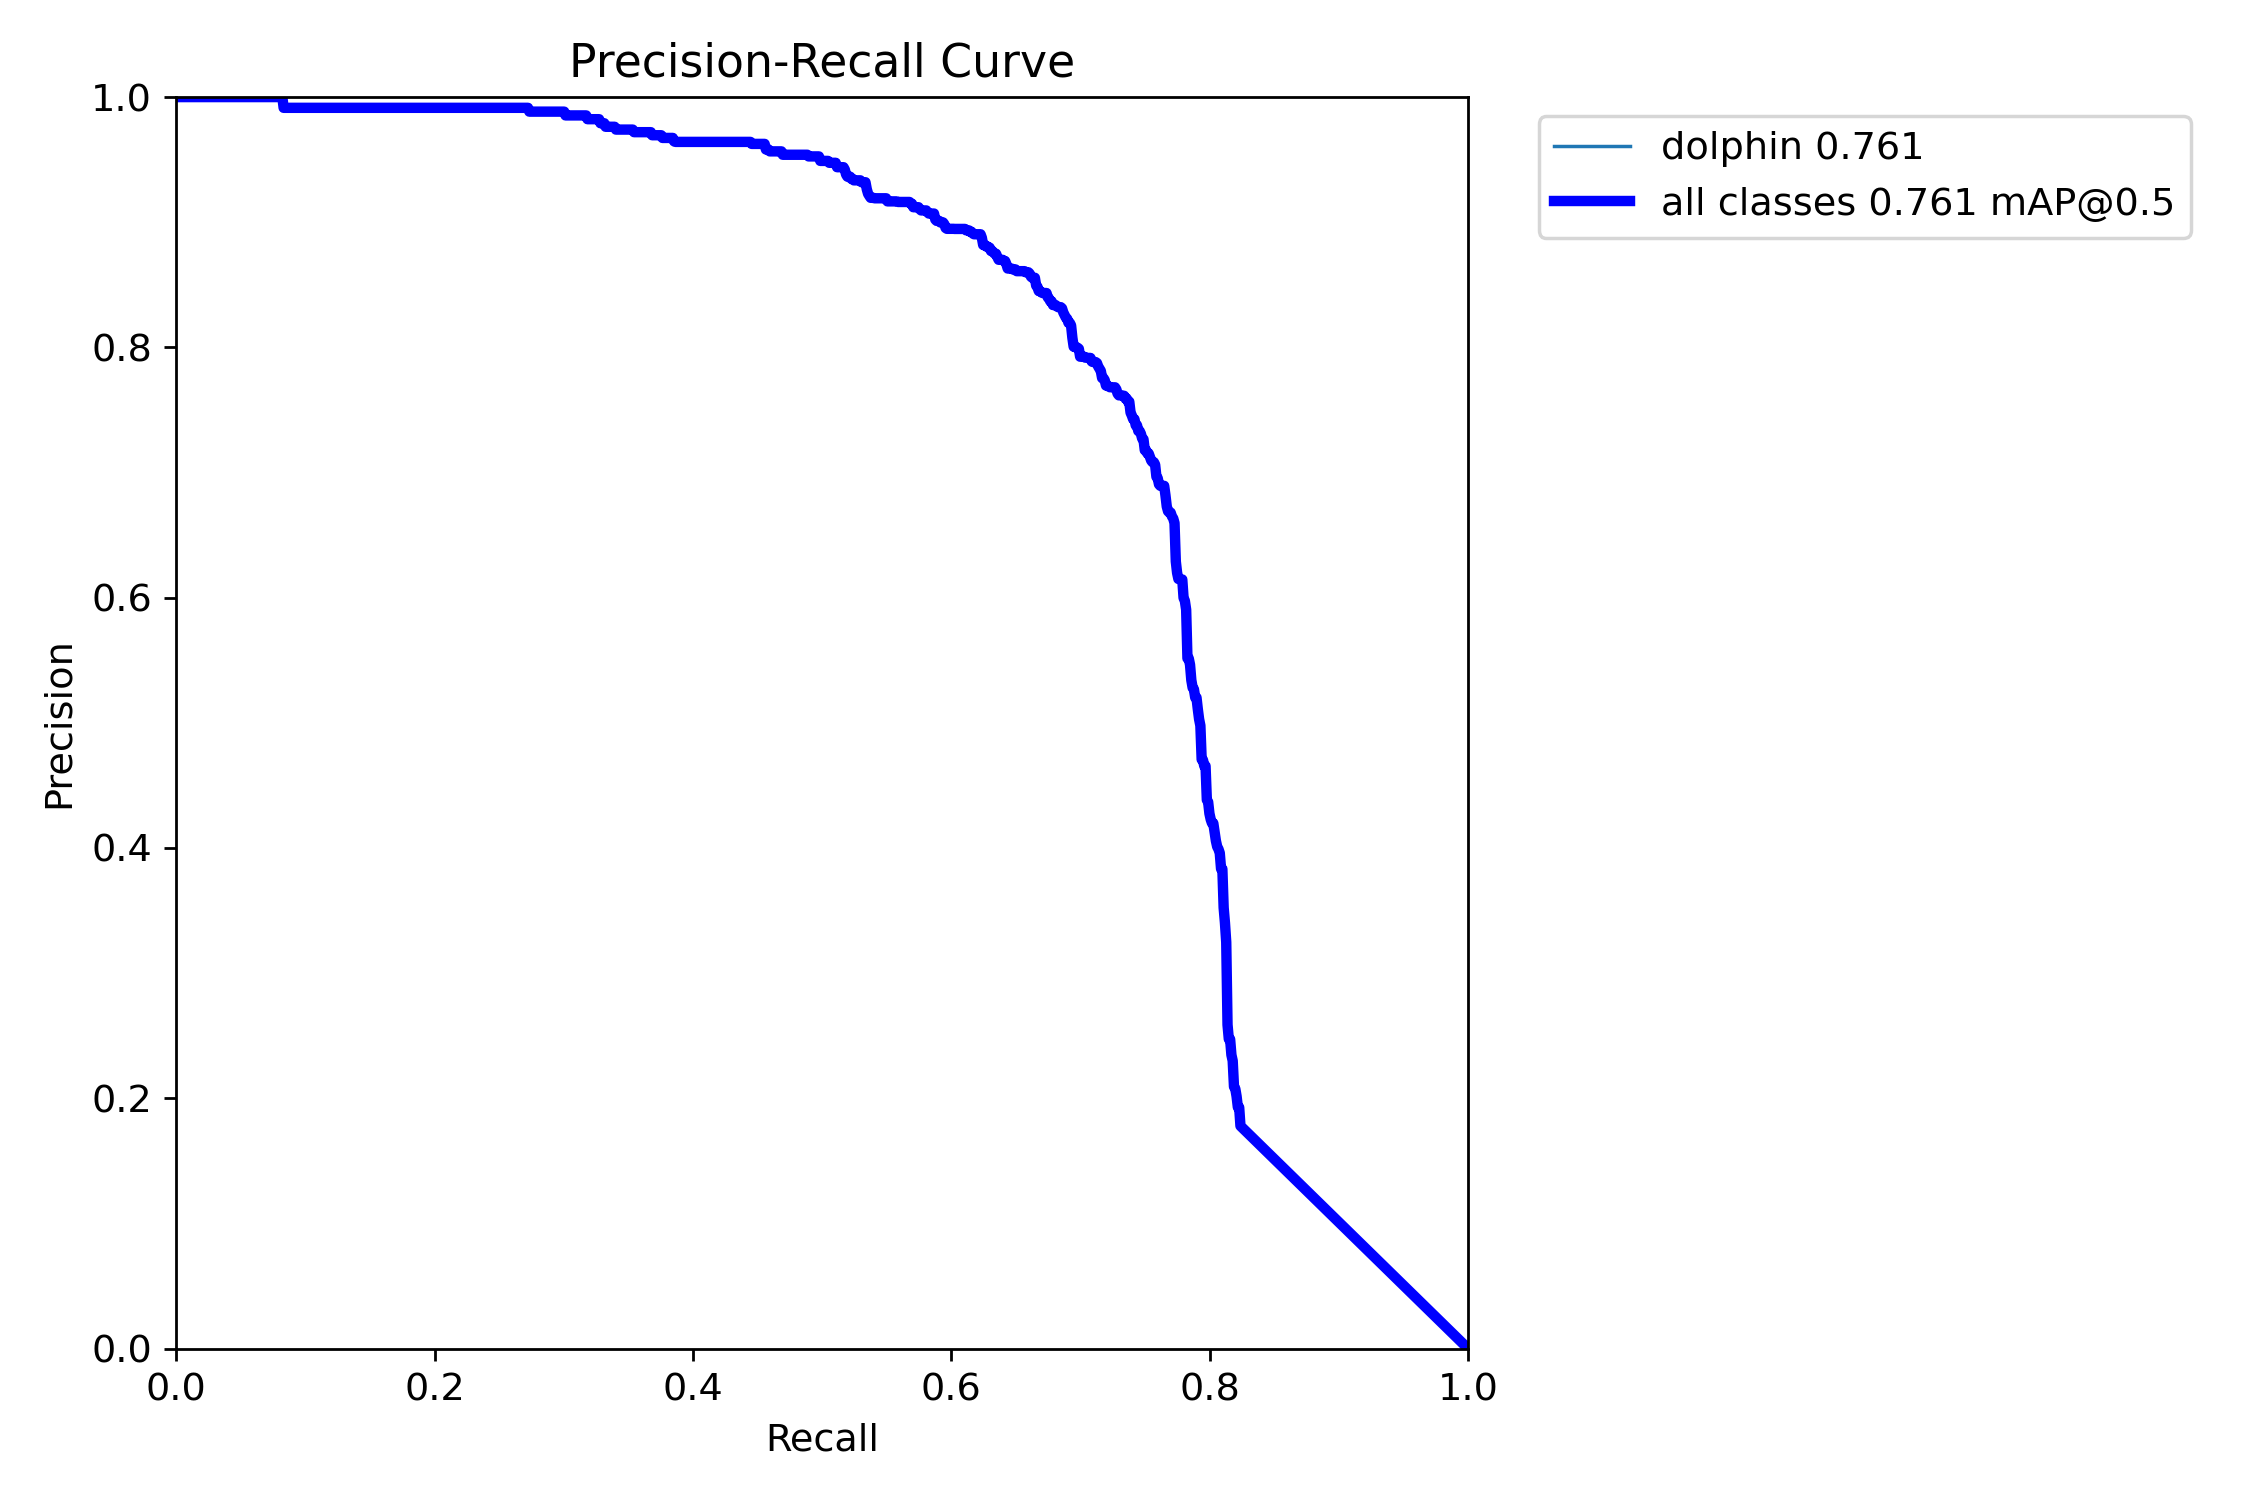

In [ ]:
IPyImage(filename= "/content/drive/MyDrive/Colab_Notebooks/Detector/train2_ultralytics/PR_curve.png", width = 650)

#Predicciones con best.pt

In [ ]:
# Importe de dataset
from google.colab import drive
drive.mount('/content/drive') #Conecto GDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
#Montar modelo para predecir
##La carpeta contiene 480 (maomeno) imagenes para testear.
import ultralytics
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Detector/train2_ultralytics/best.pt")
source = '/content/drive/MyDrive/Detector/sin_etiquetar/20240720_205509_drone_frame_719.png'
results = model(source)

##El modelo no es capaz de detectar todos los individuos de todas las imágenes pero en algunos casos lo hace.


image 1/1 /content/drive/MyDrive/Detector/sin_etiquetar/20240720_205509_drone_frame_719.png: 384x640 (no detections), 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


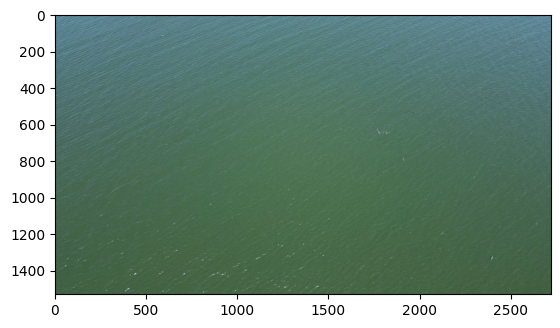

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Cargar la imagen con las predicciones
img = results[0].plot()

# Mostrar la imagen con las predicciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Ruta de la imagen
image_path = '/content/drive/MyDrive/Colab_Notebooks/Detector/sin_etiquetar/20240720_203950_drone_frame_3595.png'

# Leer la imagen
img = cv2.imread(image_path)

# Mostrar la imagen con matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
#Visualizar imagen más anotación .txt
import cv2
import matplotlib.pyplot as plt
import os

# Función para dibujar los cuadros delimitadores
def draw_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: No se pudo leer la imagen {image_path}")
        return None

    try:
        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                img_height, img_width, _ = img.shape

                x_min = int((x_center - width / 2) * img_width)
                y_min = int((y_center - height / 2) * img_height)
                x_max = int((x_center + width / 2) * img_width)
                y_max = int((y_center + height / 2) * img_height)

                cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo de etiquetas {label_path}")
        return None


    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return img


# Ejemplo de uso
image_path = '/content/drive/MyDrive/Colab_Notebooks/Detector/sin_etiquetar/20240720_203950_drone_frame_3595.png'
label_path = '/content/drive/MyDrive/Colab_Notebooks/Detector/sin_etiquetar/20240720_203950_drone_frame_3595.txt' #Reemplaza con la ruta correcta del archivo .txt

image_with_boxes = draw_boxes(image_path, label_path)

if image_with_boxes is not None:
    # Guardar la imagen con los cuadros delimitadores (opcional)
    #cv2.imwrite('imagen_con_cuadros.jpg', image_with_boxes)
    print("Imagen procesada correctamente.")


Error: No se pudo leer la imagen /content/drive/MyDrive/Colab_Notebooks/Detector/sin_etiquetar/20240720_203950_drone_frame_3595.png
